# Heart Attack Prediction and Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [3]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Dataset Description
* Age : Age of the patient
* Sex : Sex of the patient sex (1 = male; 0 = female)
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
* Value 0: no pain
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
* trtbps : resting blood pressure (in mmHg)
* chol : cholesterol in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalachh : maximum heart rate achieved
* oldpeak = ST depression induced by exercise relative to rest
* slp = the slope of the peak exercise ST segment
* target : 0= less chance of heart attack 1= more chance of heart  attack


In [4]:
df.shape

(303, 14)

In [5]:
df.apply(lambda x: sum(x.isnull()),axis=0)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df1 = df.copy()
df1 = df1.replace({ "sex":{0: "female",1: "male"},
                   
                    "cp": { 0: "typical angina",1: "atypical angina",2: "non-anginal pain",
                          3: "asymptomatic"},
                   
                    "exng": {0: "no",1: "yes"},
                   
                    "restecg": {0: "normal",1: "ST-T wave abnormality",
                                2: "left ventricular hypertrophy"},
                   
                    "output": {0: "no heart attack",1: "heart attack"}
                  })

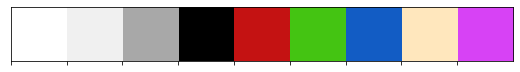

In [8]:
# rename values of colours for easy identification
colors = ["#fff", "#f0f0f0", "#a8a8a8", "#000", "#c41212", "#44c412", "#125cc4", "#ffe7bd", "#d742f5"]
WHITE, GREY, DARKGREY, BLACK, RED, GREEN, BLUE, BEIGE, PINK = colors
sns.palplot(colors)

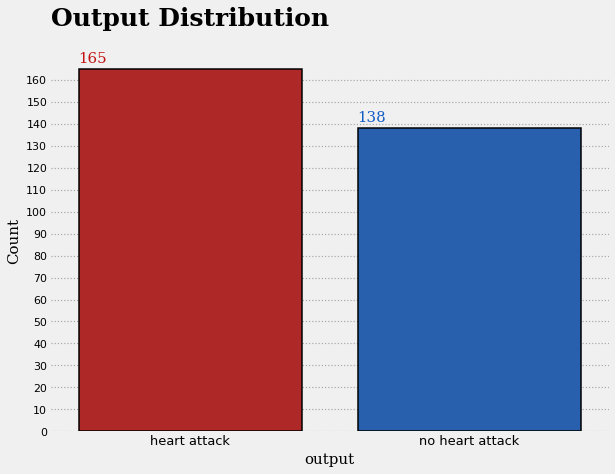

In [9]:
# set the figure size and colour
fig, ax = plt.subplots(figsize=(10, 7))
fig.set_facecolor(GREY)
ax.set_facecolor(GREY)


# plot a bar chart of the output distribution
df1_output = df1["output"]
palette_ = [RED, BLUE]
sns.countplot(x=df1_output, linewidth=1.5, palette=palette_, edgecolor=BLACK, zorder=2)
ax.set_title(label='Output Distribution',  loc="left", fontsize=25, fontweight="bold", 
             fontfamily="serif", y=1.05)
ax.grid(color=DARKGREY, axis="y", linewidth=1.2, linestyle=":", zorder=0)

for i, patch in enumerate(ax.patches):
    patch_x = patch.get_x()
    patch_y = patch.get_height()
    ax.annotate(text=patch_y, xy=(patch_x, patch_y+3), fontfamily="serif",
                fontsize=15, color=palette_[i])  
    
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)
    
ax.set_xlabel("output", fontsize=15, labelpad=5, fontfamily="serif")
ax.xaxis.set_tick_params(labelsize=13, size=0)

ax.set_ylabel("Count", fontsize=15, labelpad=5, fontfamily="serif")
ax.set_yticks(range(0, 170, 10))
ax.yaxis.set_tick_params(labelsize=11, size=0)

fig.show()

We can see that the output distribution is fairly balanced

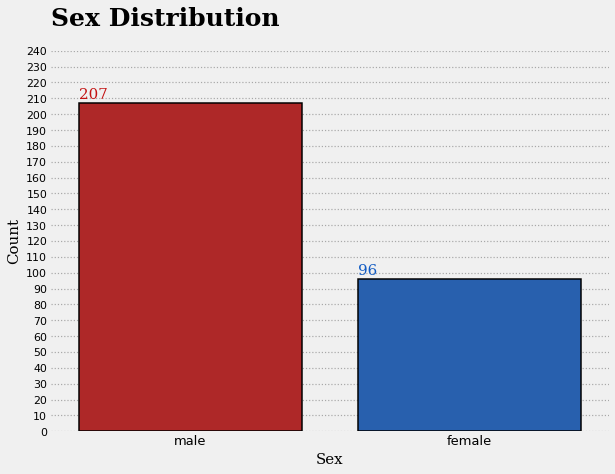

In [10]:
# set the figure size and colour
fig, ax = plt.subplots(figsize=(10, 7))
fig.set_facecolor(GREY)
ax.set_facecolor(GREY)


# plot a bar chart of the Sex distribution
data = df1["sex"]
palette_ = [RED, BLUE]
sns.countplot(x=data, linewidth=1.5, palette=palette_, edgecolor=BLACK, zorder=2)
ax.set_title(label='Sex Distribution',  loc="left", fontsize=25, fontweight="bold", 
             fontfamily="serif", y=1.05)
ax.grid(color=DARKGREY, axis="y", linewidth=1.2, linestyle=":", zorder=0)

for i, patch in enumerate(ax.patches):
    patch_x = patch.get_x()
    patch_y = patch.get_height()
    ax.annotate(text=patch_y, xy=(patch_x, patch_y+3), fontfamily="serif",
                fontsize=15, color=palette_[i])  
    
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)
    
ax.set_xlabel("Sex", fontsize=15, labelpad=5, fontfamily="serif")
ax.xaxis.set_tick_params(labelsize=13, size=0)

ax.set_ylabel("Count", fontsize=15, labelpad=5, fontfamily="serif")
ax.set_yticks(range(0, 250, 10))
ax.yaxis.set_tick_params(labelsize=11, size=0)

fig.show()

We can see the records of males is significantly higher than the females

In [11]:
# select out the numeric features and convert the data type to float
numeric_features = ["age", "trtbps", "chol", "oldpeak", "thalachh"]
df1[numeric_features] = df1[numeric_features].astype(np.float32)

# Numeric Features Distribution

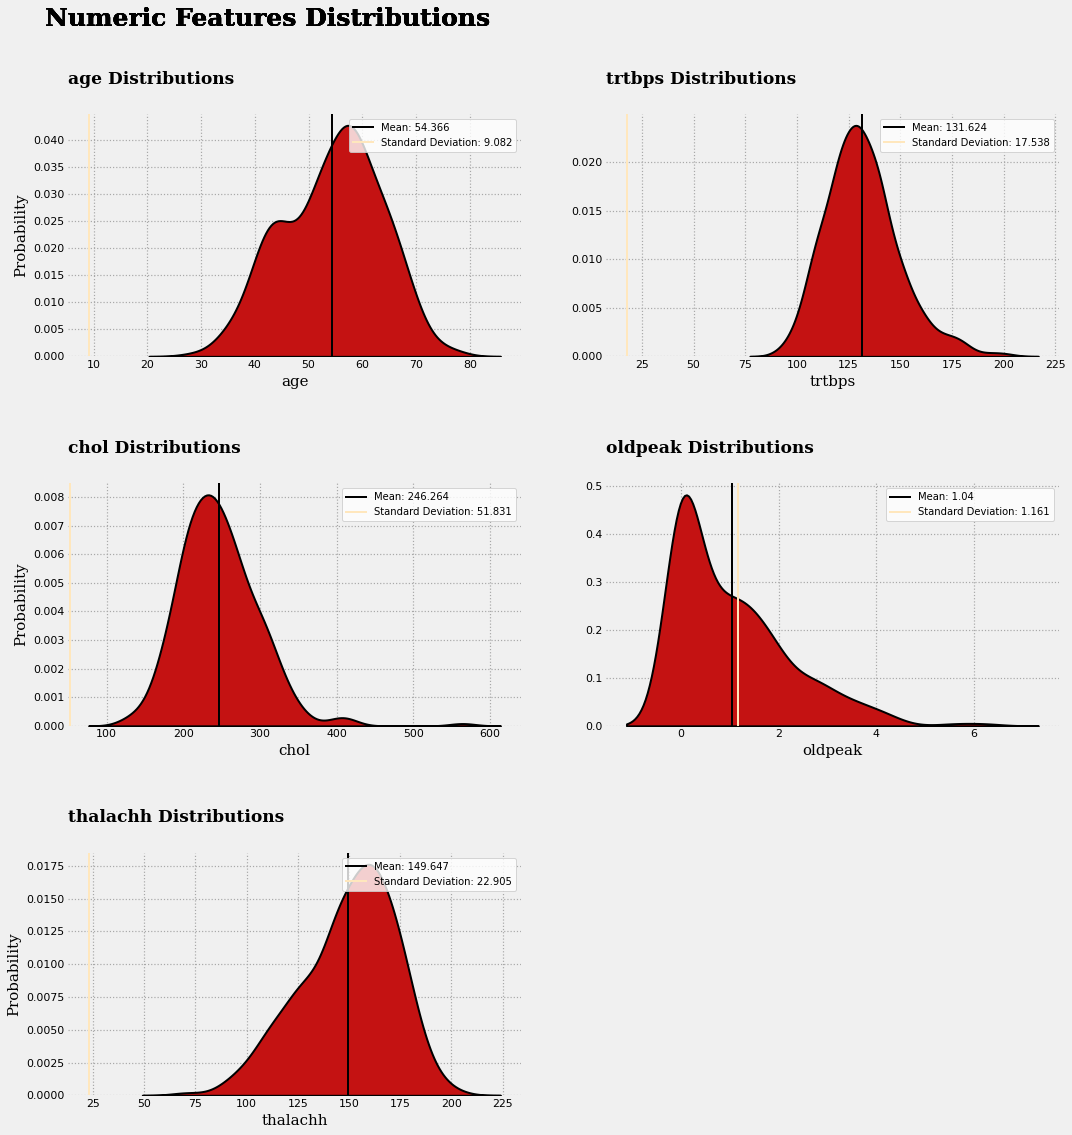

In [12]:
# plot the distributions of the numeric features
fig = plt.figure(figsize=(15, 15))
fig.set_facecolor(GREY)

for i, feature in enumerate(numeric_features):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_facecolor(GREY)
    data = df1[feature]
    mean = data.mean()
    std = data.std()

    sns.kdeplot(x=data, fill=True, color=RED, alpha=1, 
                edgecolor=BLACK, linewidth=2, zorder=2, ax=ax)
    ax.grid(color=DARKGREY, axis="both", linewidth=1.2, linestyle=":", zorder=0)
    
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)
        
    ax.set_xlabel(feature, fontsize=15, labelpad=5, fontfamily="serif")
    ax.xaxis.set_tick_params(labelsize=11, size=0)
    
    if i % 2 == 0:
        ax.set_ylabel("Probability", fontsize=15, labelpad=5, fontfamily="serif")
    else:
        ax.set_ylabel("")
        
    ax.axvline(mean, color=BLACK, linewidth=2, label=f"Mean: {np.round(mean, 3)}")
    ax.axvline(std, color=BEIGE, linewidth=2, label=f"Standard Deviation: {np.round(std, 3)}")
    
    ax.yaxis.set_tick_params(labelsize=11, size=0)
    
    ax.set_title(label=f"{feature} Distributions", fontsize=17, 
                 y=1.1, loc="left", fontweight="bold", fontfamily="serif")
    ax.legend()
    
    fig.text(s="Numeric Features Distributions", x=0.045, y=1.03, fontsize=25, fontweight="bold", fontfamily="serif")
    fig.tight_layout(h_pad=5, w_pad=5)
    fig.show()

From the above,we can point out the following: 
* mean age is about 54 years
* trtbps : the mean of the resting blood pressure (in mmHg) is 131.62
* chol : the mean of the cholesterol in mg/dl fetched via BMI sensor is 246.3
* oldpeak : the mean of the ST depression induced by exercise relative to rest is 1.04
* thalachh : the mean of the maximum heart rate achieved is 149.65 

In [13]:
categorical_columns = ["sex", "cp", "fbs", "slp", "caa", "thall", "output"]
df1[categorical_columns] = df1[categorical_columns].astype(np.str)
categorical_features = categorical_columns[:-1]

# Categorical Features Distribution

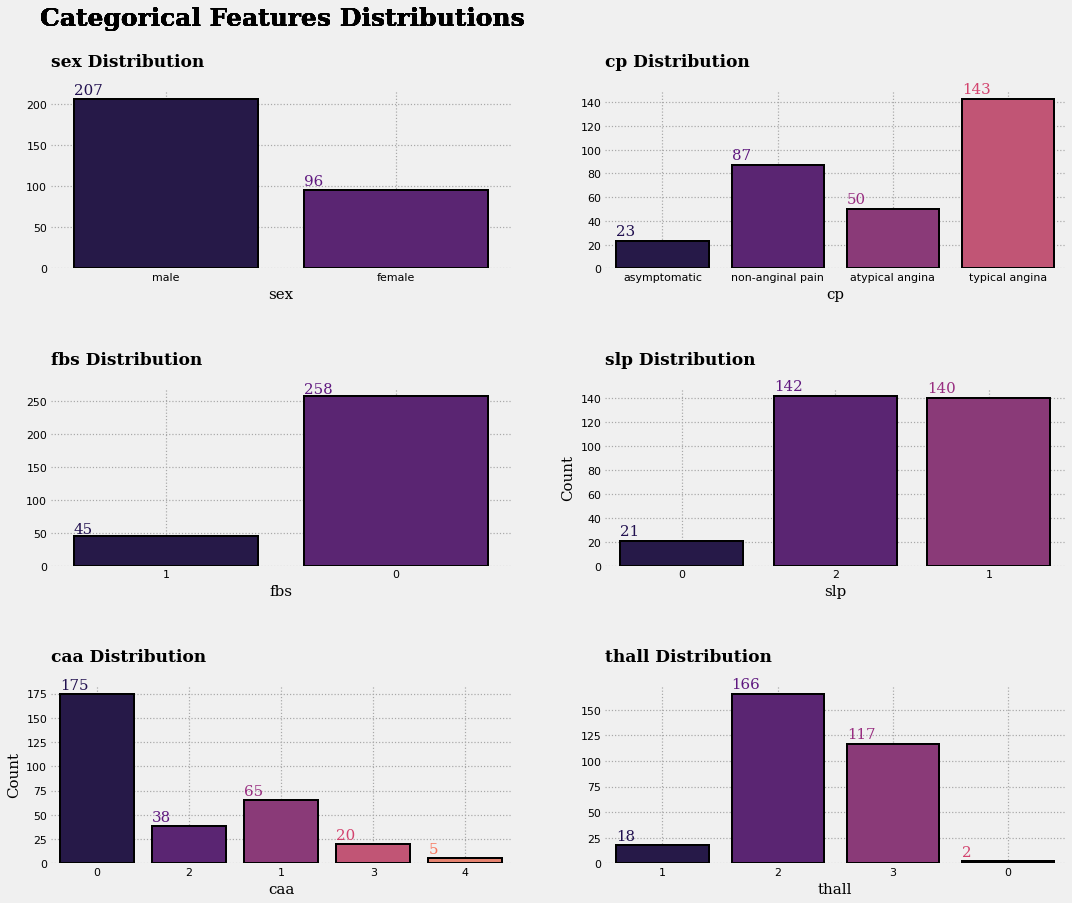

In [14]:
fig = plt.figure(figsize=(15, 12))
fig.set_facecolor(GREY)

magma = sns.color_palette("magma")

for i, feature in enumerate(categorical_features):
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_facecolor(GREY)
    data = df1[feature]
    mean = int(data.value_counts().mean())
    
    sns.countplot(x=data, edgecolor=BLACK, linewidth=2, palette=magma, zorder=2, ax=ax)
    ax.grid(color=DARKGREY, axis="both", linewidth=1.2, linestyle=":", zorder=0)

    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)
        
    for i, patch in enumerate(ax.patches):
        patch_x = patch.get_x()
        patch_y = patch.get_height()
        ax.annotate(text=patch_y, xy=(patch_x, patch_y+5), 
                    fontfamily="serif", fontsize=15, color=magma[i])

    ax.set_xlabel(feature, fontsize=15, labelpad=5, fontfamily="serif")
    ax.xaxis.set_tick_params(labelsize=11, size=0)
        
    if i % 2 == 0:
        ax.set_ylabel("Count", fontsize=15, labelpad=5, fontfamily="serif")
    else:
        ax.set_ylabel("")
    
    ax.yaxis.set_tick_params(labelsize=11, size=0)
    
    ax.set_title(label=f"{feature} Distribution", fontsize=17, y=1.1, 
                 loc="left", fontweight="bold", fontfamily="serif")
    
    fig.text(s="Categorical Features Distributions", x=0.04, y=1.02, 
         fontsize=25, fontweight="bold", fontfamily="serif")
    fig.tight_layout(h_pad=5, w_pad=5)
    fig.show()

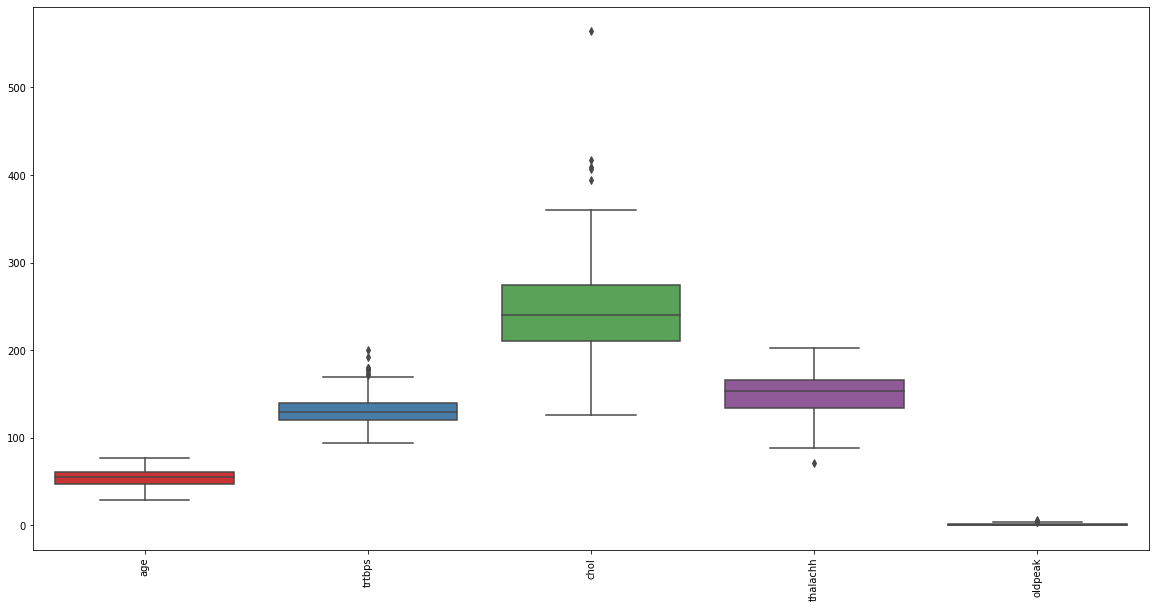

In [15]:
# Data desription to show outliers

plt.figure(figsize=(20,10))
sns.boxplot(data = df1, palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [40]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()

    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************')

    return df

In [41]:
df = removeOutlier(df.trtbps, df)
df = removeOutlier(df.chol, df)
df.head()

lowerbound:  79.00933393568636  -------- upperbound:  184.23819081678892
0  number of outliers from  301
 ******************************************************
lowerbound:  90.29311096799373  -------- upperbound:  401.7135335502787
0  number of outliers from  297
 ******************************************************


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

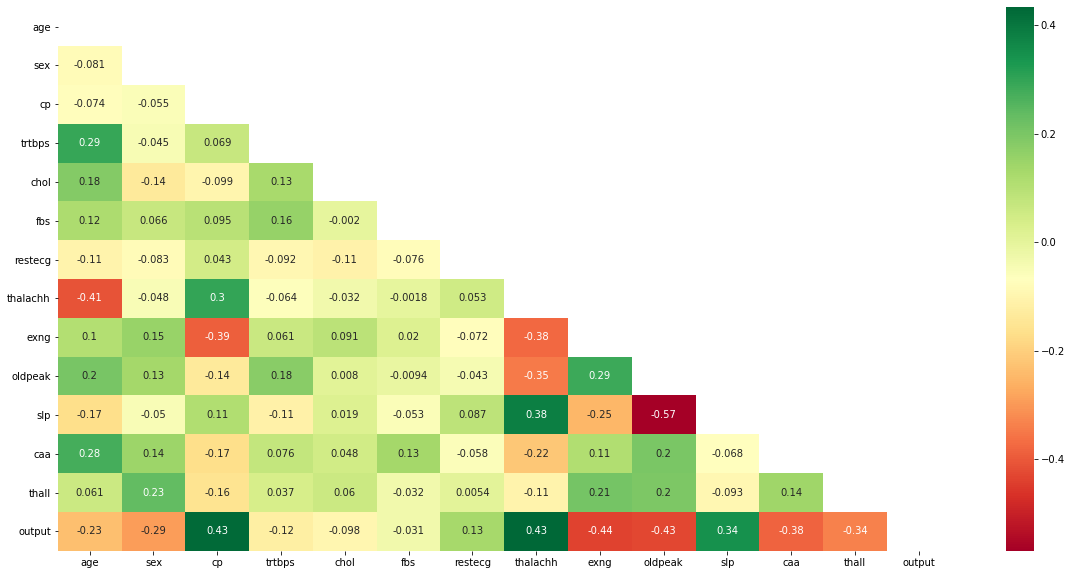

In [83]:
corrmat = df.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
plt.figure(figsize=(20,10))
sns.heatmap(corrmat, mask=mask, annot = True, cmap = "RdYlGn")

In [30]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

# Resampling the imbalanced dataset

In [52]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = df[df.output==1]
df_2 = df[df.output==0]
 
# Upsample minority class
df_upsample_1 = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=163,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_upsample_1])
 
# Display new class counts
df_upsampled.output.value_counts()

0    163
1    163
Name: output, dtype: int64

# Splitting to train and test set coupled with scaling

In [53]:
# Split the dataset to X predicors and y responses
X = df_upsampled.drop('output', axis = 1)
y = df_upsampled['output'] 

In [54]:
# Split the dataset to training and test set
from sklearn.model_selection import train_test_split as tts
X_train,X_test, y_train, y_test = tts(X,y, test_size = 0.2, random_state = 111)

In [55]:
# Scaling the training data using standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Building ML models for prediction

In [66]:
# Import ML Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score

classifiers = [[CatBoostClassifier(verbose=0),'CatBoost Classifier'],
               [RandomForestClassifier(),'Random Forest'], 
               [KNeighborsClassifier(), 'K-Nearest Neighbours'],
               [SVC(),'SVC'],
               [DecisionTreeClassifier(), 'Decision Tree'],
               [LogisticRegression(),'Logistic Regression']]

In [67]:
for cls in classifiers:
    model = cls[0]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('****************')
    print(cls[0])
    print ('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)


****************
Confusion Matrix:
[[26  1]
 [ 2 37]]
Accuracy :  95.45454545454545
****************
RandomForestClassifier()
Confusion Matrix:
[[26  1]
 [ 1 38]]
Accuracy :  96.96969696969697
****************
KNeighborsClassifier()
Confusion Matrix:
[[24  3]
 [ 6 33]]
Accuracy :  86.36363636363636
****************
SVC()
Confusion Matrix:
[[26  1]
 [ 3 36]]
Accuracy :  93.93939393939394
****************
DecisionTreeClassifier()
Confusion Matrix:
[[26  1]
 [11 28]]
Accuracy :  81.81818181818183
****************
LogisticRegression()
Confusion Matrix:
[[26  1]
 [ 2 37]]
Accuracy :  95.45454545454545


In [74]:
lr_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lr_model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print ('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)

Confusion Matrix:
[[26  1]
 [ 2 37]]
Accuracy :  95.45454545454545


# Model explainability with ALE (Accumulated Local Effects)

In [69]:
pip install alibi

     |████████████████████████████████| 307 kB 412 kB/s eta 0:00:01
     |████████████████████████████████| 22.3 MB 3.8 MB/s eta 0:00:01    |▌                               | 358 kB 3.6 MB/s eta 0:00:07
     |████████████████████████████████| 93.8 MB 84 kB/s s eta 0:00:01     |██████████████████▍             | 53.9 MB 4.2 MB/s eta 0:00:10
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.3.2-py2.py3-none-any.whl size=93807573 sha256=2c25954b8929be1a3aa97e82f0df385307ba9dc9f04eeda2da40880f856682a1
  Stored in directory: /root/.cache/pip/wheels/53/c2/ca/b2496a732bb10cc3d4adea066bb3f9f427fb22a4df7aebbd76
Successfully built spacy-lookups-data
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following d

In [70]:
from alibi.explainers.ale import ALE, plot_ale

In [ ]:
### ALE on Logistic Regression in probability space

In [75]:
proba_fun_lr = lr_model.predict_proba

In [77]:
proba_ale_lr = ALE(proba_fun_lr, feature_names=X.columns)

In [79]:
#proba_exp_lr = proba_ale_lr.explain(x_train.values)
proba_exp_lr = proba_ale_lr.explain(X_train)

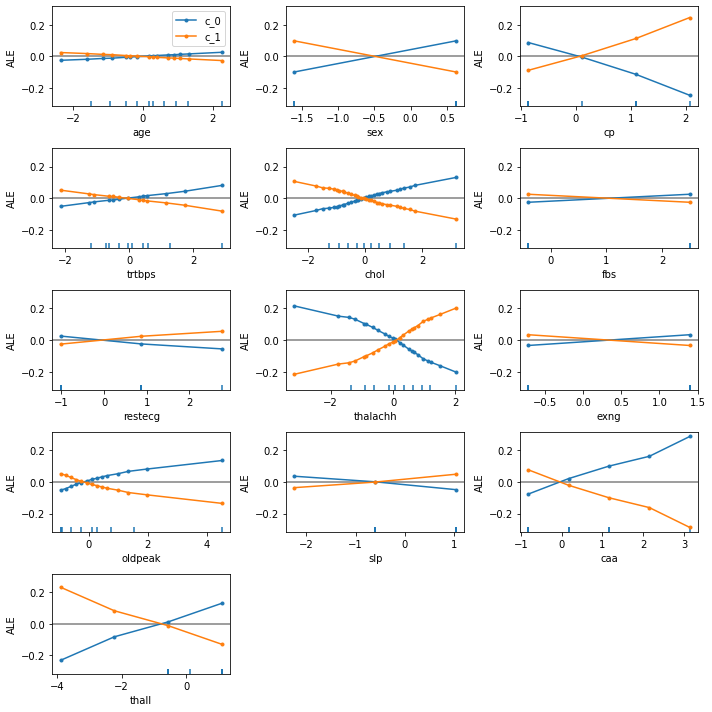

In [80]:
plot_ale(proba_exp_lr, fig_kw={'figwidth': 10, 'figheight': 10});

In [82]:
X.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

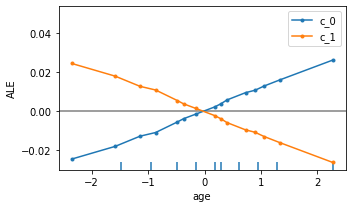

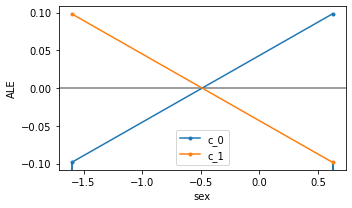

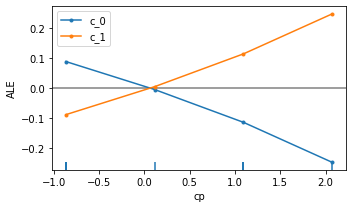

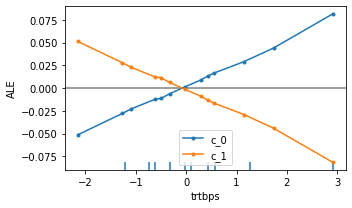

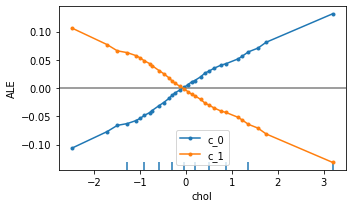

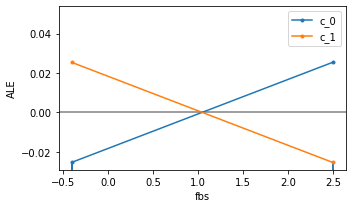

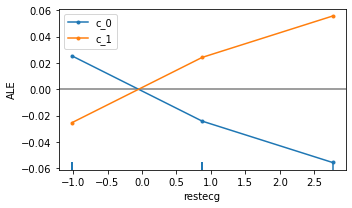

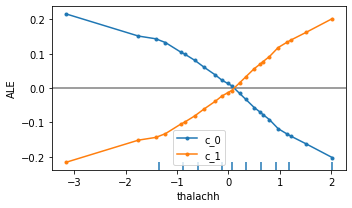

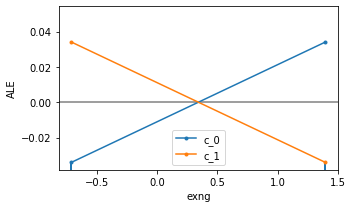

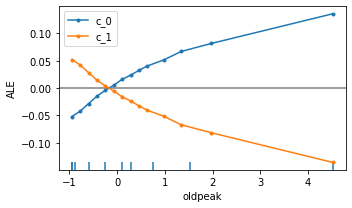

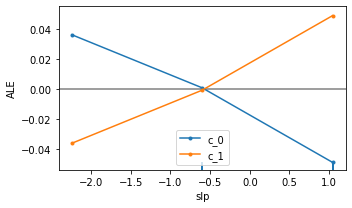

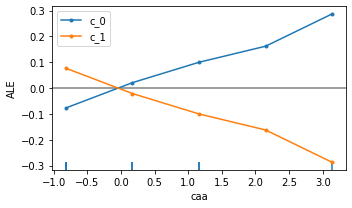

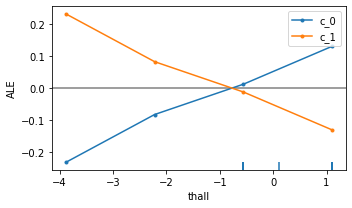

In [81]:
plot_ale(proba_exp_lr, features = ['age'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['sex'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['cp'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['trtbps'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['chol'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['fbs'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['restecg'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['thalachh'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['exng'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['oldpeak'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['slp'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['caa'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['thall'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);